**[MSE-01]** 모듈을 임포트하고 난수의 시드를 설정한다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

np.random.seed(20160604)

**[MSE-02]** MNIST 데이터 세트를 준비한다.

In [3]:
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


**[MSE-03]** 소프트맥스 함수에 의한 확률 p 계산식을 준비한다.

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

**[MSE-04]** 오차 함수 loss와 트레이닝 알고리즘 train_step을 준비한다.

In [5]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

**[MSE-05]** 정답률 accuracy를 정의한다.

In [6]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[MSE-06]** 세션을 준비하고 Variable을 초기화한다.

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

**[MSE-07]** 파라미터 최적화를 2000회 반복한다.

1회 실행할 때마다 트레이닝 세트에서 추출한 100개의 데이터를 이용해 경사 하강법을 적용한다.

최종적으로 테스트 세트에 대해 약 92%의 정답률을 얻을 수 있다.

In [8]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 7603.619141, Accuracy: 0.846600
Step: 200, Loss: 5408.005859, Accuracy: 0.876400
Step: 300, Loss: 4555.091797, Accuracy: 0.890200
Step: 400, Loss: 4083.703125, Accuracy: 0.898900
Step: 500, Loss: 3789.353271, Accuracy: 0.902400
Step: 600, Loss: 3591.773438, Accuracy: 0.905800
Step: 700, Loss: 3437.780762, Accuracy: 0.908900
Step: 800, Loss: 3344.480957, Accuracy: 0.910200
Step: 900, Loss: 3259.129395, Accuracy: 0.912200
Step: 1000, Loss: 3197.664795, Accuracy: 0.912800
Step: 1100, Loss: 3120.902832, Accuracy: 0.914100
Step: 1200, Loss: 3069.317871, Accuracy: 0.915200
Step: 1300, Loss: 3027.791016, Accuracy: 0.916100
Step: 1400, Loss: 3020.354492, Accuracy: 0.917900
Step: 1500, Loss: 2979.335693, Accuracy: 0.916500
Step: 1600, Loss: 2939.028320, Accuracy: 0.918300
Step: 1700, Loss: 2910.790039, Accuracy: 0.919300
Step: 1800, Loss: 2926.866943, Accuracy: 0.918500
Step: 1900, Loss: 2884.169922, Accuracy: 0.920800
Step: 2000, Loss: 2835.845947, Accuracy: 0.922000


**[MSE-08]** 이 시점의 파라미터를 이용해 테스트 세트에 대한 예측을 출력한다.

여기서는 '0' ~ '9'의 숫자에 대해 정답과 오답 예를 3개씩 출력한다.

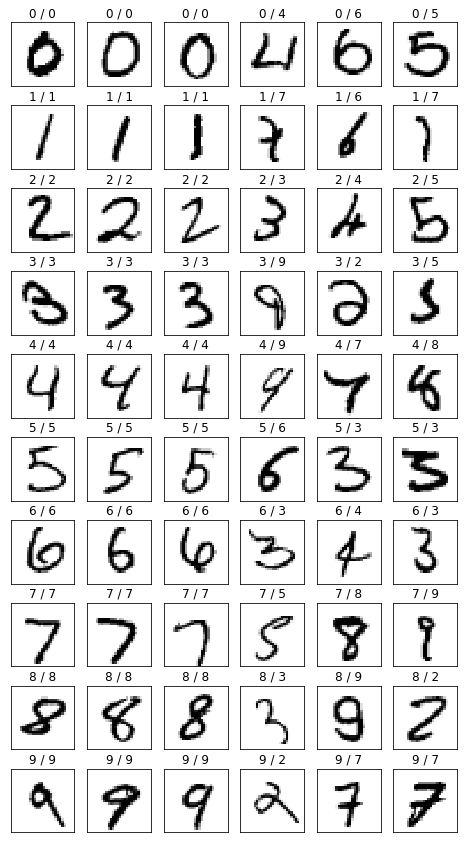

In [9]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break